Importing the Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [58]:
# loading the csv data to a Pandas DataFrame
gold_dataset = pd.read_csv('gld_price_data.csv')

In [59]:
# print first 5 rows in the dataframe
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [60]:
# print last 5 rows of the dataframe
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [61]:
# number of rows and columns
gold_dataset.shape

(2290, 6)

In [62]:
# getting some basic information about the data
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [63]:
# checking the number of missing values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [64]:
# getting the statistical measures of the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [65]:
correlation = gold_dataset.corr()

<AxesSubplot:>

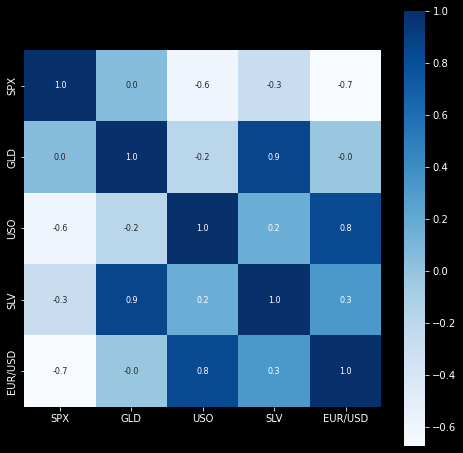

In [66]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [67]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


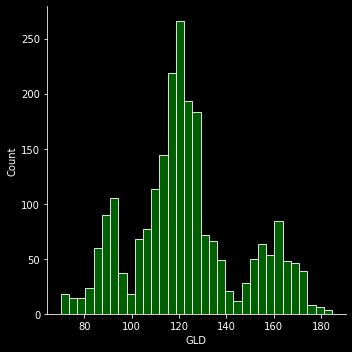

In [68]:
# checking the distribution of the GLD Price
sns.displot(gold_dataset['GLD'], color='green')

Splitting the Features and Target

In [80]:
x = gold_dataset.drop(columns={'Date', 'GLD'}, axis = 1)
y = gold_dataset['GLD']

In [81]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [82]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =5)

Model Training:
Random Forest Regressor

In [91]:
randomforestregressor = RandomForestRegressor()

In [92]:
# training the model
randomforestregressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [93]:
# prediction on Test Data

test_data_prediction = randomforestregressor.predict(x_test)

In [94]:
print(test_data_prediction)

[119.36380047 163.51559947 137.10679753 121.58409976 150.61969989
 109.31899864  91.76859946 114.41320044 116.39450071  85.70990083
 167.56709778 118.31930206  92.57559887 124.68880098 120.15180007
 161.68220443 167.79170028 120.26500051 125.35060105  82.44769949
  78.60749893  87.18499932 103.91860028 156.25820282 108.07879973
 170.13609939 108.939499   121.10480155  92.29739817  83.04309984
 125.39630034 129.8158994  154.56860119 130.03690061 150.09839931
 116.19210089 163.71450072 121.62070072 126.10600031 118.44370022
 126.03350065 120.22010007 146.17830008  80.8259997  125.31510138
 104.11569861 150.13319789  98.32859972 167.75269874  84.4002998
 125.10010002 117.37679817 131.39469809  73.16670148  82.47269999
 117.34010086 123.22959826 119.71390001 104.17449867 122.79879987
 120.05059997 125.03879971 135.59380469 109.24900149 125.72319914
 106.89829975 102.57649955 107.2870983  155.6432995  119.59220102
  91.08650134 127.75390075 118.10809941 119.13369971 159.10830016
 127.556199

In [95]:
# R squared error
error_scr = metrics.r2_score(y_test, test_data_prediction)
print('R squared error: ', error_scr)

R squared error:  0.989996377160154


Compare the Actual Values and Predicted Values in a Plot

In [97]:
y_test = list(y_test)

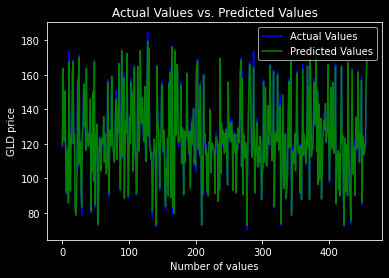

In [101]:
plt.plot(y_test, color='blue', label='Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Values vs. Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()